# Imports

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
df = pd.read_csv('Dataset/Life Expectancy Data Cleaned.csv')

In [21]:
df.head()

,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,65.0,0.870937,2.160447,-1.160741,-0.547177,-1.787131,1.884074,-0.966460,2.061133,-2.267657,0.994394,-1.284956,-0.630602,-0.727149,1.992970,2.707513,2.736257,-0.799278,-0.632234
1,0,59.9,0.939982,2.160447,-1.160741,-0.541429,-2.030194,0.721209,-0.991640,2.061133,-1.729809,1.003140,-1.475014,-0.630602,-0.720844,-0.741246,2.707513,2.736257,-0.814611,-0.663931
2,0,59.9,0.914090,2.160447,-1.160741,-0.542208,-1.868152,0.546903,-1.016819,2.061133,-1.476704,0.981275,-1.348309,-0.630602,-0.716620,1.992970,2.707513,2.736257,-0.845278,-0.695627
3,0,59.5,0.948612,2.160447,-1.160741,-0.529490,-1.625090,1.884074,-1.041999,2.061133,-1.160323,1.151819,-1.158251,-0.630602,-0.708147,0.133879,2.707513,2.736257,-0.881056,-0.727324
4,0,59.2,0.974504,2.160447,-1.160741,-0.711585,-1.544069,1.884074,-1.062143,2.061133,-1.097047,0.867579,-1.094899,-0.630602,-0.842607,-0.052700,2.707513,2.736257,-0.927056,-0.822414


# Prediction Function

In [22]:
def predict(x, w, b):
    return np.dot(x, w) + b

# Cost Function

In [23]:
def cost_function(x, w, b, y):
    m = len(x)
    y_hat = predict(x, w, b)
    return (1 / (2 * m)) * np.sum(np.pow((y_hat - y), 2))

# Initialize the Parameters

In [40]:
w, b = 0.0000001, 0.00000001

# Gradient Derivative

In [25]:
def gradient_derivatives(x, w, b, y):
    m = len(x)
    y_hat = predict(x, w, b)
    dw = (1 / m) * np.sum((y_hat - y) * x)
    db = (1 / m) * np.sum(y_hat - y)
    return dw, db

# Gradient Descent

In [26]:
def gradient_descent(x, w, b, y, lr, num_iters):

    cost_history = []
    for i in range(num_iters):
        dw, db = gradient_derivatives(x, w, b, y)
        w -= lr * dw
        b -= lr * db

        cost = cost_function(x, w, b, y)
        cost_history.append(cost)
        print(f"Cost at iteration {i} = {cost}")

    return w, b, cost_history


In [37]:
print(w, b)

0.0 0.0


# Train the Model

In [44]:
predictor = df["infant deaths"].values
target = df["Life expectancy"].values
lr = .01
num_iters = 2000
w, b, cost_history = gradient_descent(predictor, w, b, target, lr, num_iters)

Cost at iteration 0 = 30.615816581425566
Cost at iteration 1 = 30.615816581425563
Cost at iteration 2 = 30.615816581425566
Cost at iteration 3 = 30.615816581425563
Cost at iteration 4 = 30.615816581425566
Cost at iteration 5 = 30.615816581425563
Cost at iteration 6 = 30.615816581425566
Cost at iteration 7 = 30.615816581425566
Cost at iteration 8 = 30.615816581425563
Cost at iteration 9 = 30.615816581425566
Cost at iteration 10 = 30.61581658142556
Cost at iteration 11 = 30.615816581425563
Cost at iteration 12 = 30.615816581425566
Cost at iteration 13 = 30.615816581425566
Cost at iteration 14 = 30.615816581425563
Cost at iteration 15 = 30.615816581425566
Cost at iteration 16 = 30.615816581425566
Cost at iteration 17 = 30.615816581425566
Cost at iteration 18 = 30.615816581425566
Cost at iteration 19 = 30.61581658142556
Cost at iteration 20 = 30.615816581425563
Cost at iteration 21 = 30.615816581425563
Cost at iteration 22 = 30.615816581425566
Cost at iteration 23 = 30.615816581425566
Cost

In [42]:
print(f"W: {w}, b: {b}")

W: -5.385064283900593, b: 69.23319659227771


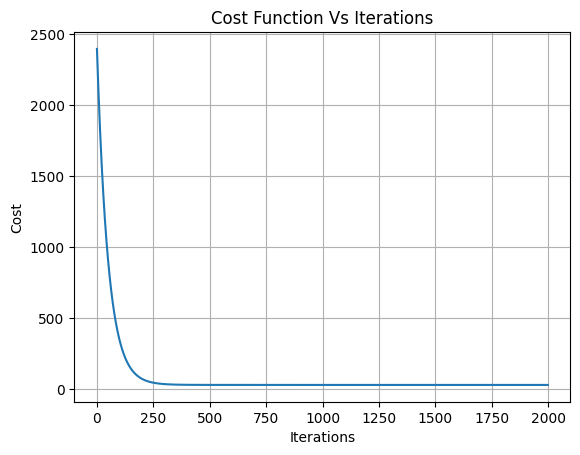

In [30]:
plt.plot(np.arange(0, len(cost_history)), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Vs Iterations")
plt.grid(True)
plt.show()

In [45]:
# Assuming df is ready and standardized
# 'Life expectancy ' is the target
target_S = 'Life expectancy'
#features = df.columns.drop(target)  # all other columns are features
features = "infant deaths"

# Split into X and y
X = df[features]
X = X.values.reshape(-1, 1)
y = df[target_S]

# Optional: split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Regression coefficients
print("Intercept (b):", model.intercept_)
print("Coefficients (w):")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef}")


Mean Squared Error: 60.925573511278564
R^2 Score: 0.2939777802482576
Intercept (b): 69.1804048097328
Coefficients (w):
i: -5.43882646959211


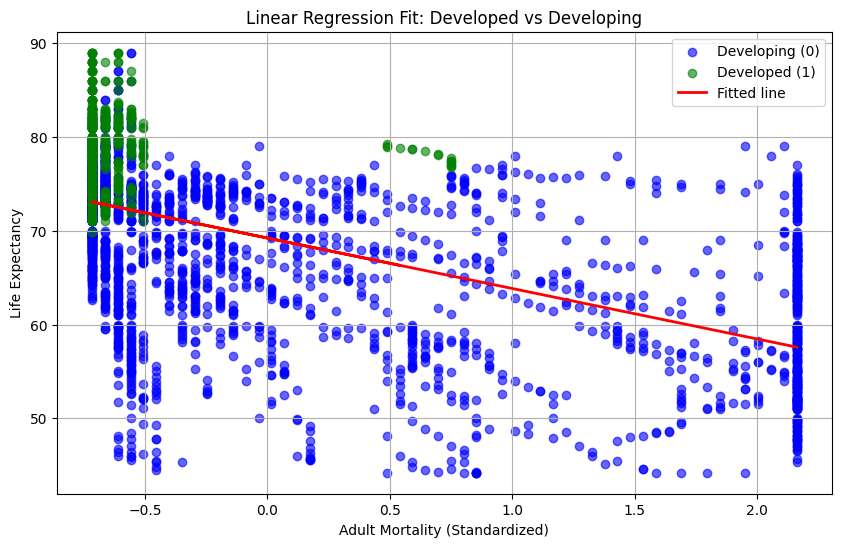

In [46]:
# 1. Create a "mask" (filter) for each group
# This checks the 'Status' column for 1s (Developed) and 0s (Developing)
mask_developed = df['Status'] == 1
mask_developing = df['Status'] == 0

plt.figure(figsize=(10, 6))

# 2. Plot the 'Developing' countries (Status 0) in Blue
plt.scatter(predictor[mask_developing], target[mask_developing], 
            color="blue", alpha=0.6, label="Developing (0)")

# 3. Plot the 'Developed' countries (Status 1) in Green (or Orange)
plt.scatter(predictor[mask_developed], target[mask_developed], 
            color="green", alpha=0.6, label="Developed (1)")

# 4. Plot the regression line (This stays exactly the same)
y_pred = w * predictor + b
plt.plot(predictor, y_pred, color='red', linewidth=2, label='Fitted line')

# 5. Labels and Legend
plt.xlabel("Adult Mortality (Standardized)")
plt.ylabel("Life Expectancy")
plt.title("Linear Regression Fit: Developed vs Developing")
plt.legend()
plt.grid(True)
plt.show()